In [6]:
using BenchmarkTools
using Plotly
using Random
using StatsBase

using Information
using Kraft
using Plot

In [7]:
Random.seed!(20121020)

;

In [8]:
use_style!()

;

In [9]:
element_ = string.(Array('A':'Z'))

element_score_ = randn(length(element_))

;

In [10]:
# set_element_ = sample(
#     element_,
#     3;
#     replace = false,
# )

set_element_ = string.(collect("VXZ"))

;

In [11]:
layout = Layout(
    xaxis_title = "Element",
    xaxis_tickvals = 1:length(element_),
    xaxis_ticktext = element_,
)

;

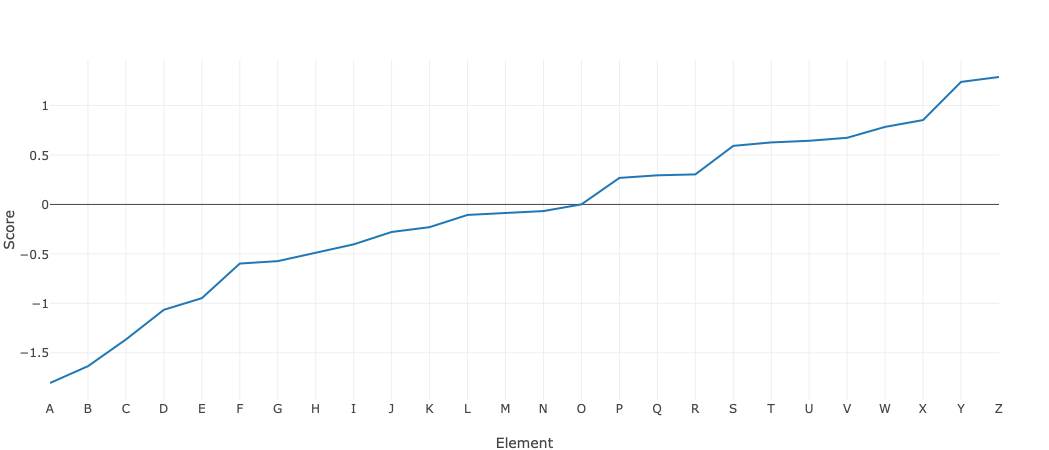

In [38]:
sort_index_ = sortperm(element_score_)

element_score_ = element_score_[sort_index_]

# element_ = element_[sort_index_]

plot_x_y(
    [element_score_];
    layout = extend_layout(
        layout;
        yaxis_title = "Score",
    ),
)

## Is

In [1]:
set_element_to_nothing = Dict(set_element => nothing for set_element in set_element_)

LoadError: UndefVarError: set_element_ not defined

In [ ]:
is_h = [haskey(
            set_element_to_nothing,
            element,
        ) for element in element_]

is_h = convert(Vector{Float64}, is_h)

is_m = 1 .- is_h

plot_x_y(
    (is_h, is_m);
    name_ = ("Hit", "Miss"),
    layout = extend_layout(layout; title = "Is"),
)

In [ ]:
is_h_p = is_h / sum(is_h)

is_h_p_cr = cumsum(is_h_p)

is_h_p_cl = cumulate_sum_reverse(is_h_p)

plot_x_y(
    (is_h_p, is_h_p_cr, is_h_p_cl);
    name_ = ("P", "CR(P)", "CL(P)"),
    layout = extend_layout(layout; title = "Is Hit"),
)

In [ ]:
is_m_p = is_m / sum(is_m)

is_m_p_cr = cumsum(is_m_p)

is_m_p_cl = cumulate_sum_reverse(is_m_p)

plot_x_y(
    (is_m_p, is_m_p_cr, is_m_p_cl);
    name_ = ("P", "CR(P)", "CL(P)"),
    layout = extend_layout(layout; title = "Is Miss"),
)

## Amplitutde

In [ ]:
a = abs.(element_score_)

plot_x_y((a,); layout = extend_layout(layout; yaxis_title = "Amplitude"))

In [ ]:
a_p = a / sum(a)

a_p_cr = cumsum(a_p)

a_p_cl = cumulate_sum_reverse(a_p)

plot_x_y(
    (a_p, a_p_cr, a_p_cl);
    name_ = ("P", "CR(P)", "CL(P)"),
    layout = extend_layout(layout; title = "Amplitude"),
)

In [ ]:
small_number = 1e-6

In [ ]:
a_h = is_h .* a

a_h_p = a_h / sum(a_h)

a_h_p_cr = cumsum(a_h_p) .+ small_number

a_h_p_cl = cumulate_sum_reverse(a_h_p) .+ small_number

plot_x_y(
    (a_h_p, a_h_p_cr, a_h_p_cl);
    name_ = ("P", "CR(P)", "CL(P)"),
    layout = extend_layout(layout; title = "Amplitude Hit"),
)

In [ ]:
a_m = is_m .* a

a_m_p = a_m / sum(a_m)

a_m_p_cr = cumsum(a_m_p) .+ small_number

a_m_p_cl = cumulate_sum_reverse(a_m_p) .+ small_number

plot_x_y(
    (a_m_p, a_m_p_cr, a_m_p_cl);
    name_ = ("P", "CR(P)", "CL(P)"),
    layout = extend_layout(layout; title = "Amplitude Miss"),
)

## KS

In [ ]:
plot_x_y(
    (is_h_p_cl, is_m_p_cl);
    name_ = ("Hit", "Miss"),
    layout = extend_layout(layout; title = "<==C(P(Is))"),
)

ks = is_h_p_cl - is_m_p_cl

plot_x_y((ks,); layout = extend_layout(layout; title = "KS", yaxis_title = "Set Score"))

## JSD

In [ ]:
plot_x_y(
    (a_p_cl, a_h_p_cl, a_m_p_cl);
    name_ = ("Amplitude", "Hit", "Miss"),
    layout = extend_layout(layout; title = "CL(P)"),
)

jsd_l = compute_jsd(a_h_p_cl, a_m_p_cl, a_p_cl)

plot_x_y(
    (jsd_l,);
    layout = extend_layout(layout; title = "JSD L", yaxis_title = "Set Score"),
)

In [ ]:
plot_x_y(
    (a_p_cr, a_h_p_cr, a_m_p_cr);
    name_ = ("Amplitude", "Hit", "Miss"),
    layout = extend_layout(layout; title = "CR(P)"),
)

jsd_r = compute_jsd(a_h_p_cr, a_m_p_cr, a_p_cr)

plot_x_y(
    (jsd_r,);
    layout = extend_layout(layout; title = "JSD R", yaxis_title = "Set Score"),
)

In [ ]:
jsd = jsd_l - jsd_r

plot_x_y((jsd,); layout = extend_layout(layout; title = "JSD", yaxis_title = "Set Score"))

## Score

In [ ]:
s = ks

In [ ]:
score = sum(s) / length(s)